In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
start_date = '2020-01-01'
end_date = '2020-03-20'
pingan = yf.download(tickers='601318.ss', start=start_date, end=end_date)
pingan.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,85.900002,86.790001,85.879997,86.120003,72.726860,77825207
2020-01-03,86.809998,86.879997,85.900002,86.199997,72.794411,59498001
2020-01-06,85.919998,86.870003,85.500000,85.599998,72.287727,63644804
2020-01-07,86.010002,86.459999,85.669998,86.150002,72.752197,45218832
2020-01-08,85.000000,85.000000,85.000000,85.000000,71.781029,62805311


In [8]:
pingan_signal = pd.DataFrame(index=pingan.index)
pingan_signal['price'] = pingan['Adj Close']
pingan_signal['diff'] = pingan_signal['price'].diff()
pingan_signal = pingan_signal.fillna(0.0)
pingan_signal['signal'] = np.where(pingan_signal['diff'] > 0, 0, 1)
pingan_signal['order'] = pingan_signal['signal'].diff() * 100
pingan_signal.head()

,price,diff,signal,order
Date,,,,
2020-01-02,72.726860,0.000000,1,NaN
2020-01-03,72.794411,0.067551,0,-100.0
2020-01-06,72.287727,-0.506683,1,100.0
2020-01-07,72.752197,0.464470,0,-100.0
2020-01-08,71.781029,-0.971169,1,100.0


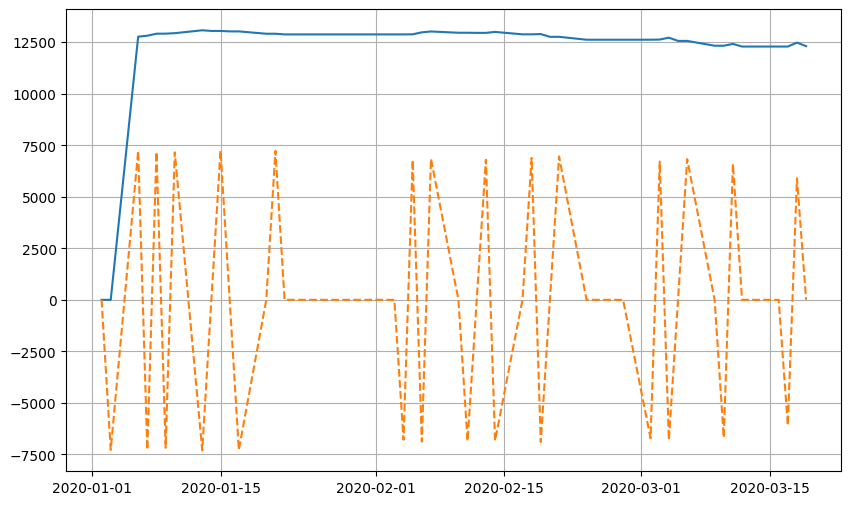

In [10]:
initial_cash = 20000.0
pingan_signal['stock'] = pingan_signal['order']*pingan_signal['price']
pingan_signal['cash'] = initial_cash - (pingan_signal['order'].diff()*pingan_signal['price']).cumsum()
pingan_signal['total'] = pingan_signal['stock'] + pingan_signal['cash']
pingan_signal = pingan_signal.fillna(0.0)
plt.figure(figsize=(10,6))
plt.plot(pingan_signal['total'])
# plt.plot(pingan_signal['order'].cumsum()*pingan_signal['price'],'--',label='stock value')
plt.plot(pingan_signal['stock'],'--',label='stock value')
plt.grid()
# plt.legend(loc='center right')
plt.show()

In [11]:
pingan_signal.head(10)

,price,diff,signal,order,stock,cash,total
Date,,,,,,,
2020-01-02,72.726860,0.000000,1,0.0,0.000000,0.000000,0.000000
2020-01-03,72.794411,0.067551,0,-100.0,-7279.441071,0.000000,0.000000
2020-01-06,72.287727,-0.506683,1,100.0,7228.772736,5542.454529,12771.227264
2020-01-07,72.752197,0.464470,0,-100.0,-7275.219727,20092.893982,12817.674255
2020-01-08,71.781029,-0.971169,1,100.0,7178.102875,5736.688232,12914.791107
2020-01-09,71.814819,0.033791,0,-100.0,-7181.481934,20099.652100,12918.170166
2020-01-10,71.595245,-0.219574,1,100.0,7159.524536,5780.603027,12940.127563
2020-01-13,73.005524,1.410278,0,-100.0,-7300.552368,20381.707764,13081.155396
2020-01-14,73.326424,0.320900,0,0.0,0.000000,13049.065399,13049.065399


In [13]:
pingan_signal['rma10'] = pingan_signal['price'].rolling(10).mean()
pingan_signal.head(20)

,price,diff,signal,order,stock,cash,total,rma10
Date,,,,,,,,
2020-01-02,72.726860,0.000000,1,0.0,0.000000,0.000000,0.000000,NaN
2020-01-03,72.794411,0.067551,0,-100.0,-7279.441071,0.000000,0.000000,NaN
2020-01-06,72.287727,-0.506683,1,100.0,7228.772736,5542.454529,12771.227264,NaN
2020-01-07,72.752197,0.464470,0,-100.0,-7275.219727,20092.893982,12817.674255,NaN
2020-01-08,71.781029,-0.971169,1,100.0,7178.102875,5736.688232,12914.791107,NaN
2020-01-09,71.814819,0.033791,0,-100.0,-7181.481934,20099.652100,12918.170166,NaN
2020-01-10,71.595245,-0.219574,1,100.0,7159.524536,5780.603027,12940.127563,NaN
2020-01-13,73.005524,1.410278,0,-100.0,-7300.552368,20381.707764,13081.155396,NaN
2020-01-14,73.326424,0.320900,0,0.0,0.000000,13049.065399,13049.065399,NaN


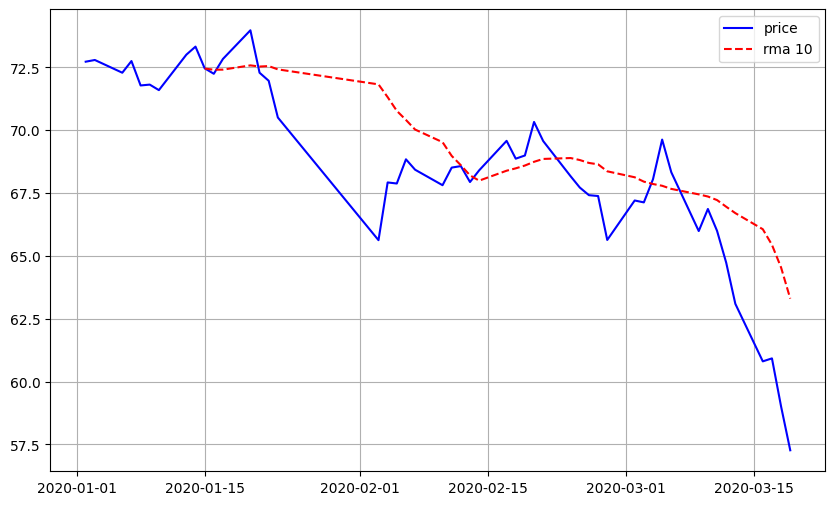

In [20]:
plt.figure(figsize=(10,6))
plt.plot(pingan_signal['price'], '-b', label='price')
plt.plot(pingan_signal['rma10'], '--r', label='rma 10')
plt.legend()
plt.grid()